-> CinemaDatabaseReader
-> ParameterWidgets
-> DatabaseQuery
-> ImageReader
-> ImageRenderer
-> ImageRenderer
-> ImageUI


<IPython.core.display.Javascript object>


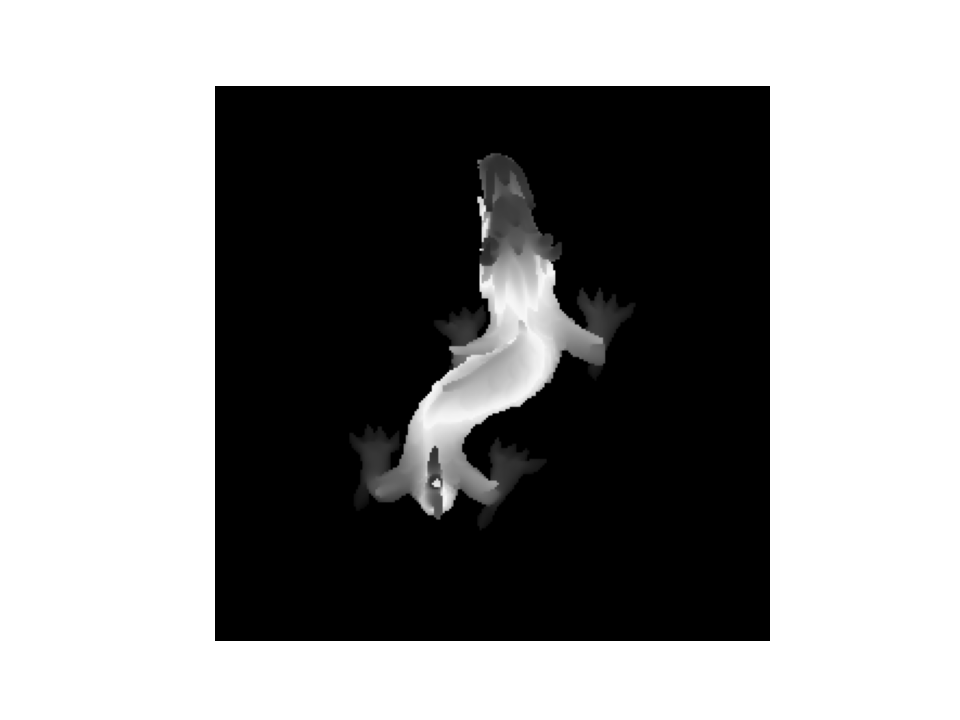

In [1]:
# This matplotlib magic function is crucial to get better server-client performance
%matplotlib notebook

import cinemasci

# open a cinema database
cdb = cinemasci.CinemaDatabaseReader();
cdb.inputs.Path.set('/home/jones/external/data/ttk-data/DragonImages.cdb' )

# create widgets
pw = cinemasci.ParameterWidgets();
pw.inputs.Table.set(cdb.outputs.Table)

# query data products
query = cinemasci.DatabaseQuery();
query.inputs.Table.set(cdb.outputs.Table,False);
query.inputs.Query.set(pw.outputs.SQL);

# read data products
imageReader = cinemasci.ImageReader();
imageReader.inputs.Table.set(query.outputs.Table)

# render data products
imageRenderer = cinemasci.ImageRenderer();
imageRenderer.inputs.Images.set( imageReader.outputs.Images );

imageRenderer2 = cinemasci.ImageRenderer();
imageRenderer2.inputs.Images.set( imageRenderer.outputs.Images );

# create output viewport
imageUI = cinemasci.ImageUI()
imageUI.inputs.Images.set( imageRenderer2.outputs.Images )

# build UI
import ipywidgets as widgets
display(imageUI.fig)
widgets.HBox(pw.widgets)